# This dataset is focus on hyperparameter tuning and at the end there is an example with multivariate forecasting
- In fuzzy time series, what are the different parameter that we can tune? 
- How to assess the performance per combination of parameter? 
- What is the effect of the number of partition on the performance of the model? 
- At what point are we overfitting by increasing the # of partitions? 
- What is the effect of order on the performance and complexity of the model? 
- How can we deal with the effect of 0 in the series.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/Users/philippebeliveau/Desktop/Bureau/Notebook_Jupyter_R/datah-m1-challange/sales.csv")

In [5]:
df.head()

,DATE,S100,I100,C100,C101,QTT
0,2017-01-08,0,0,12,76,2
1,2017-01-08,0,0,12,149,3
2,2017-01-08,0,0,12,256,3
3,2017-01-08,0,0,12,354,3
4,2017-01-08,0,0,13,149,2


In [6]:
df.shape[0]

2749369

Starts in 2017 and end in 2021

<function matplotlib.pyplot.show(close=None, block=None)>

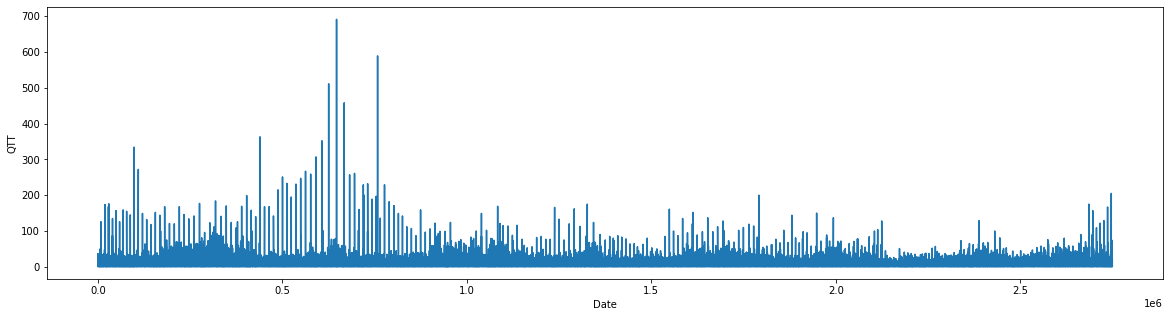

In [7]:
plt.figure(figsize=(20,5))
plt.plot(df["QTT"])

plt.xlabel("Date")
plt.ylabel("QTT")
plt.show

## Number of zeros

In [8]:
df.eq(0).sum()

DATE        0
S100    99850
I100     8841
C100     6601
C101       89
QTT         0
dtype: int64

## Transformation
We can use pyFTS own transformations tool. Although, I am not sure how are we going to integrate our own transformation in the partionning function.

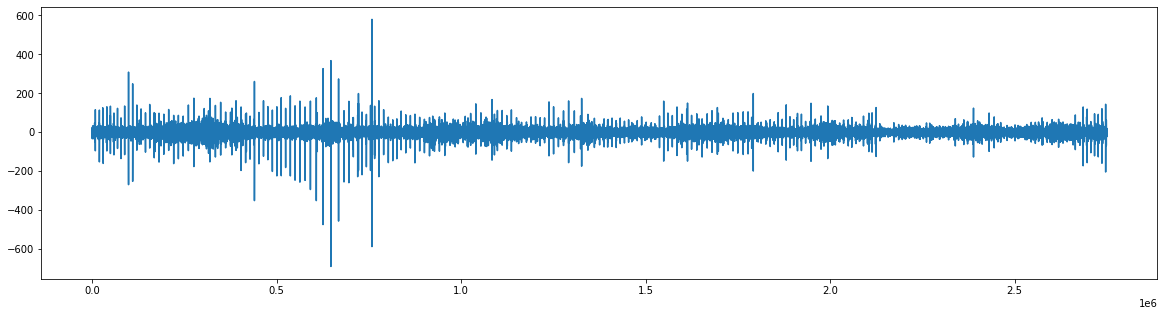

In [9]:
from pyFTS.common import Transformations

diff = Transformations.Differential(1)
fig = plt.subplots(figsize=(20,5))
plt.plot(diff.apply(df["QTT"].values), label="QTT")
pass

# Train test split
Only the training data seems to be partionned. 

### Smaller set

In [10]:
df['DATE'] = pd.to_datetime(df["DATE"], format='%Y-%m-%d')
train = df.iloc[:300000]
test = df.iloc[300001:400000]

uni_train = train["QTT"].values
multi_train = train

uni_test = test['QTT'].values
multi_test = test

In [11]:
multi_train.head()

,DATE,S100,I100,C100,C101,QTT
0,2017-01-08,0,0,12,76,2
1,2017-01-08,0,0,12,149,3
2,2017-01-08,0,0,12,256,3
3,2017-01-08,0,0,12,354,3
4,2017-01-08,0,0,13,149,2


### Bigger set

In [26]:
train = df.iloc[:2000000]
test = df.iloc[2000001:2749369]

uni_train = train["QTT"].values
multi_train = train

uni_test = test['QTT'].values
multi_test = test

# EDA
## Stationnarity test

In [2]:
from statsmodels.tsa.stattools import adfuller
rows = []
result = adfuller(uni_train)
rows.append([result[0], result[1], result[2], result[3], result[4]])
pd.DataFrame(rows,columns=['ADF Statistic','p-value','Cr. Val. 1%','Cr. Val. 5%','Cr. Val. 10%'])

NameError: name 'uni_train' is not defined

## ACF

In [ ]:
from statsmodels.tsa.stattools import acf

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(acf(multi_train, nlags=24))
ax.set_title("Autocorrelation")
ax.set_ylabel("ACF")
ax.set_xlabel("LAG")

# Training phase

## Univariate Methods

In [12]:
from pyFTS.common import Util
from pyFTS.benchmarks import Measures
from pyFTS.partitioners import Grid,  Entropy #, Huarng
from pyFTS.models import hofts
from pyFTS.common import Membership as mf
from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.data import Enrollments

# Model training

In [ ]:
from pyFTS.partitioners import Grid
from pyFTS.models import pwfts
from pyFTS.models.ensemble import ensemble
from pyFTS.common import Util
from pyFTS.benchmarks import Measures
import matplotlib.pyplot as plt

rows = []
colors = ['red', 'purple', 'green']

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(uni_test, label='Original',color='black')

part = Grid.GridPartitioner(data=uni_train, npart=5)

model = pwfts.ProbabilisticWeightedFTS(partitioner=part, order=1)
model.fit(uni_train)
distributions = model.predict(uni_test, type='distribution')

Util.plot_distribution(ax, "Blues", distributions[:-1], fig, model.order-1)

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=5,figsize=[10,10])

row = 0
col = 0
for DATE in range(0,30):
  distributions[DATE].plot(ax[row][col])
  ax[row][col].set_title('{}day'.format(DATE))
  
  col = (DATE+1) % 4
  row = (DATE+1) // 4 

plt.tight_layout()